## 이미지 저장 방식
* Vector : 상대적인 위치로 저장해놓기 때문에 확대 및 축소에 깨짐이 없다.
* Bitmap : 픽셀 하나하나의 색상 값을 저장.

## 이미지 처리 함수

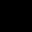

In [7]:
import numpy as np
from PIL import Image

data = np.zeros([32,32,3], dtype=np.uint8) # W, H, Channel
image = Image.fromarray(data, 'RGB')
image

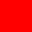

In [8]:
data[:,:] = [255,0,0]
image = Image.fromarray(data, 'RGB')
image

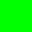

In [9]:
data[:,:] = [0,255,0]
image = Image.fromarray(data, 'RGB')
image

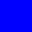

In [11]:
data[:,:] = [0,0,255]
image = Image.fromarray(data, 'RGB')
image

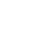

In [12]:
data[:,:] = [255,255,255]
image = Image.fromarray(data, 'RGB')
image

### 이미지 불러와서 다른 확장자로 저장

In [25]:
import os

image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'
image = Image.open(image_path)
print(f"size: {image.width} X {image.height}")
image.save(os.getenv('HOME')+'/aiffel/python_image_proc/data/jpg_pillow_practice.jpg')

size: 620 X 465


OSError: cannot write mode RGBA as JPEG

### 발생 문제
```
OSError: cannot write mode RGBA as JPEG
```
JPG는 투명도를 표현할 수 없는 포맷인데 alpha값을 저장하려 했기에 나타는 오류

In [26]:
image = image.convert('RGB')
image.save(os.getenv('HOME')+'/aiffel/python_image_proc/data/jpg_pillow_practice.jpg')

### 이미지 resize

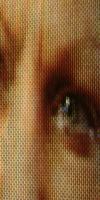

In [27]:
# image resize
resize_image = image.resize((100,200))
resize_image.save(os.getenv('HOME')+'/aiffel/python_image_proc/data/resize_pillow_practice.jpg')
resize_image

### 이미지 크롭

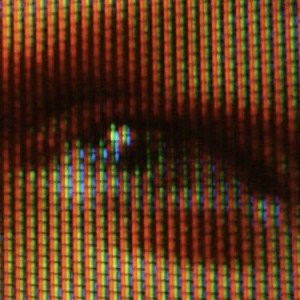

In [31]:
crop_image= image.crop((300,100,600,400))
crop_image.save(os.getenv('HOME')+'/aiffel/python_image_proc/data/crop_pillow_practice.jpg')
crop_image

## 이미지 데이터 전처리
cifal-100을 이용한 실습

In [35]:
import pickle
import os
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
print(train.keys())

<class 'dict'>
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


#### pickle 이란??
파이썬 객체 구조의 직렬화와 역 직렬화를 위한 바이너리 프로토콜
* 피클링이란 파이썬 객체 계층 구조가 바이트 스트림으로 변환    
[python 공식 문서](https://docs.python.org/ko/3/library/pickle.html)

In [37]:
print(type(train[b'data'][0]))

<class 'numpy.ndarray'>


In [38]:
train[b'data'][0].shape

(3072,)

_3072인 이유 = 채널 3 * (32*32)_    
[cifal-100 제공 페이지](https://www.cs.toronto.edu/~kriz/cifar.html)    
> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

CIFAR에서 제공하는 이미지는 32X32 크기의 이미지이다.

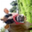

In [40]:
# 이미지 벡터를 행렬화
image_data = train[b'data'][0].reshape([32,32,3], order='F')
image = Image.fromarray(image_data)
image

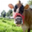

In [41]:
# 축이 뒤집혀서 나오므로 축을 바꿔준다.
image_data = image_data.swapaxes(0,1)
image = Image.fromarray(image_data)
image

In [67]:
# cifar-train 이미지를 모두 numpy배열로 읽어 이미지 파일로 저장
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)
    
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

    for i in tqdm(range(len(train[b'filenames']))):
        data_array = train[b'data'][i].reshape([32,32,3], order='F')
        data_array = data_array.swapaxes(0,1)
        image = Image.fromarray(data_array)
        image.save(os.path.join(images_dir_path, train[b'filenames'][i].decode('utf-8')))        

100%|██████████| 50000/50000 [00:18<00:00, 2736.25it/s]


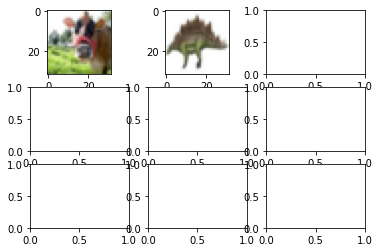

In [59]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,3)
for ax, image in zip(axes.flat, test_image):
    ax.imshow(image, cmap=plt.cm.binary)
    
plt.show()
    

## OpenCV
https://docs.opencv.org/master/d6/d00/tutorial_py_root.html    
**OpenCV에서는 RGB가 아닌 BGR순이다.**

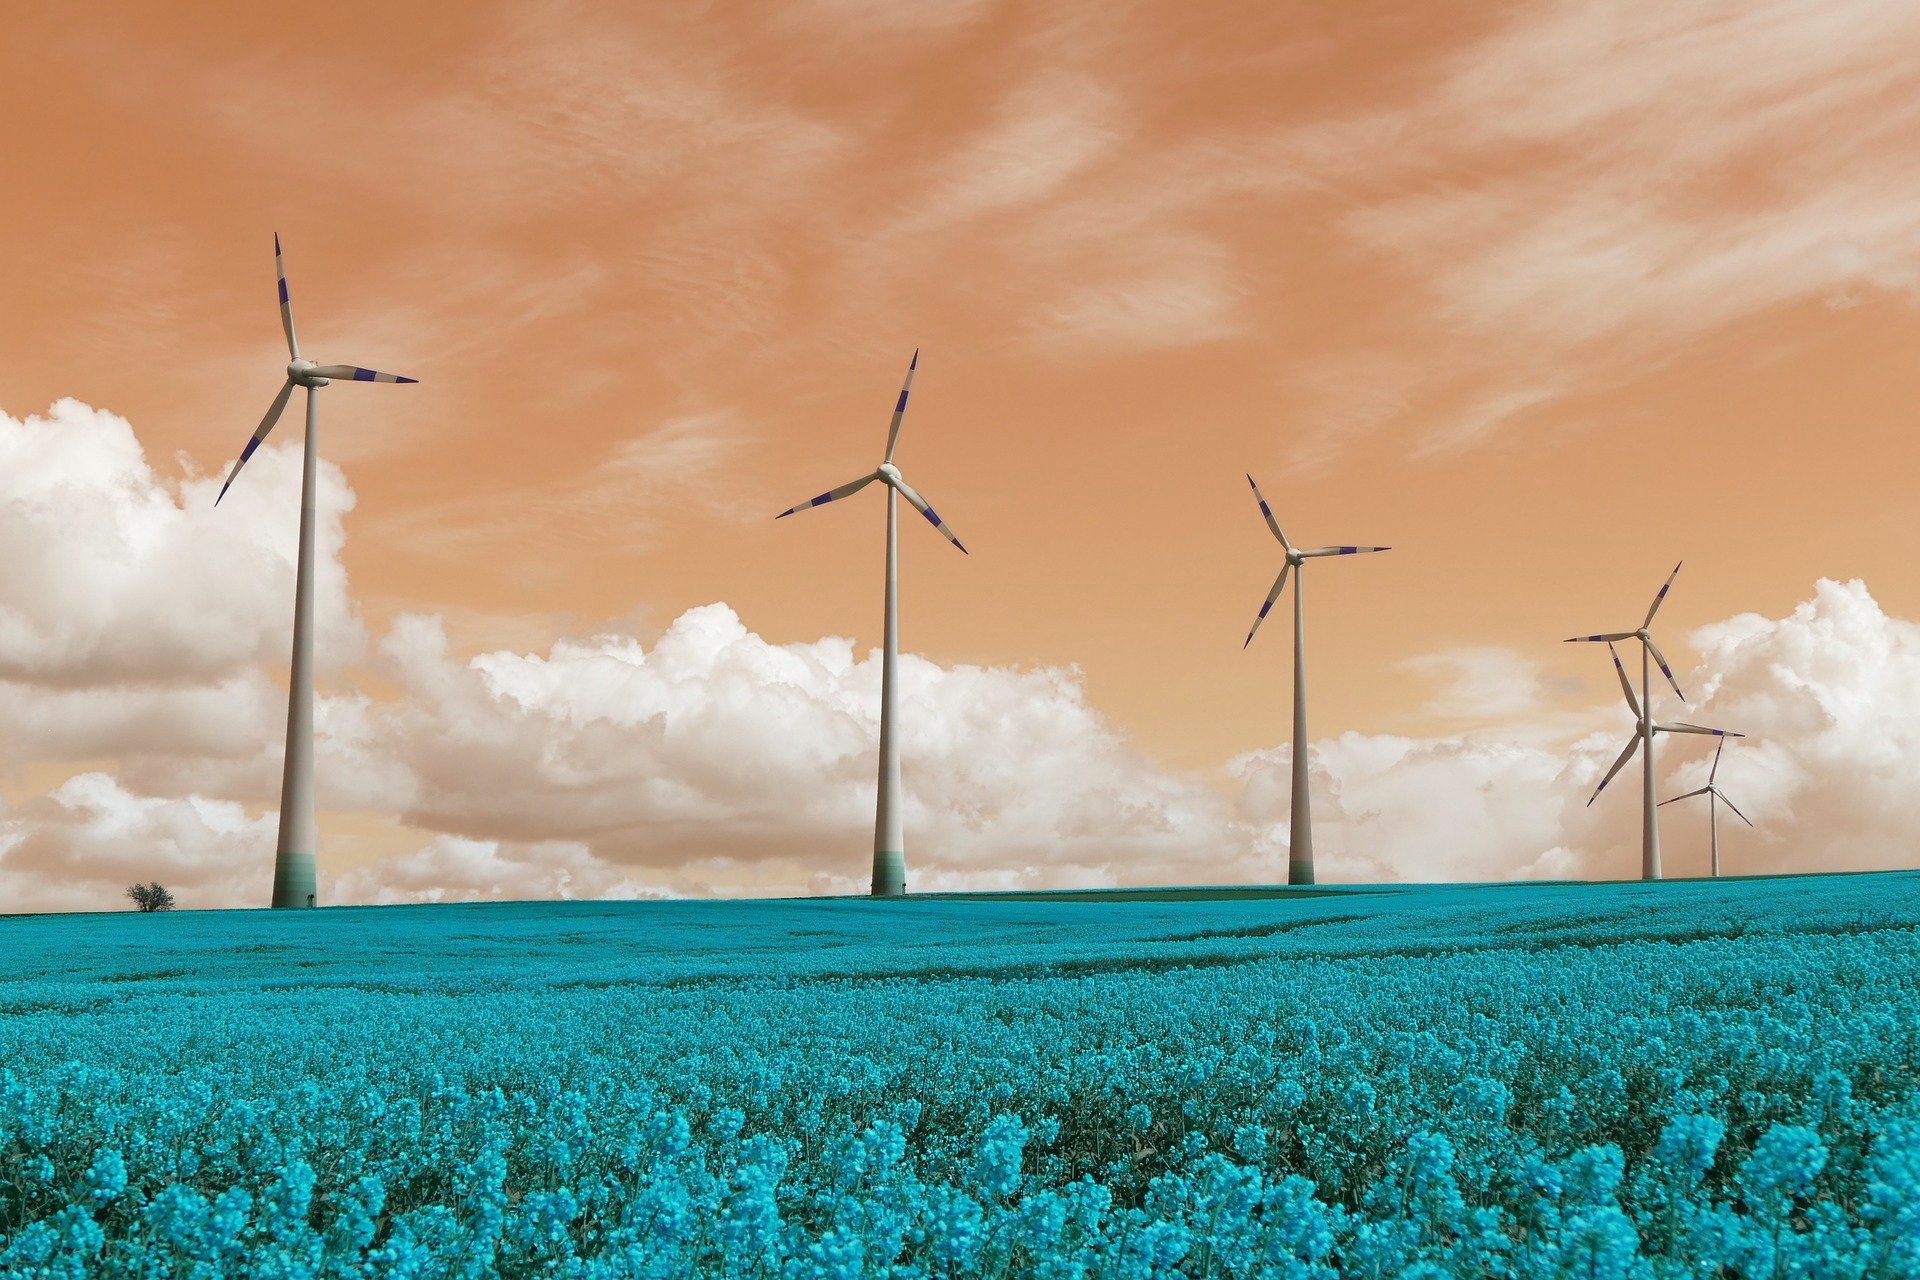

In [2]:
import os
import cv2 as cv
import numpy as np
from PIL import Image

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)
image = Image.fromarray(img)
image

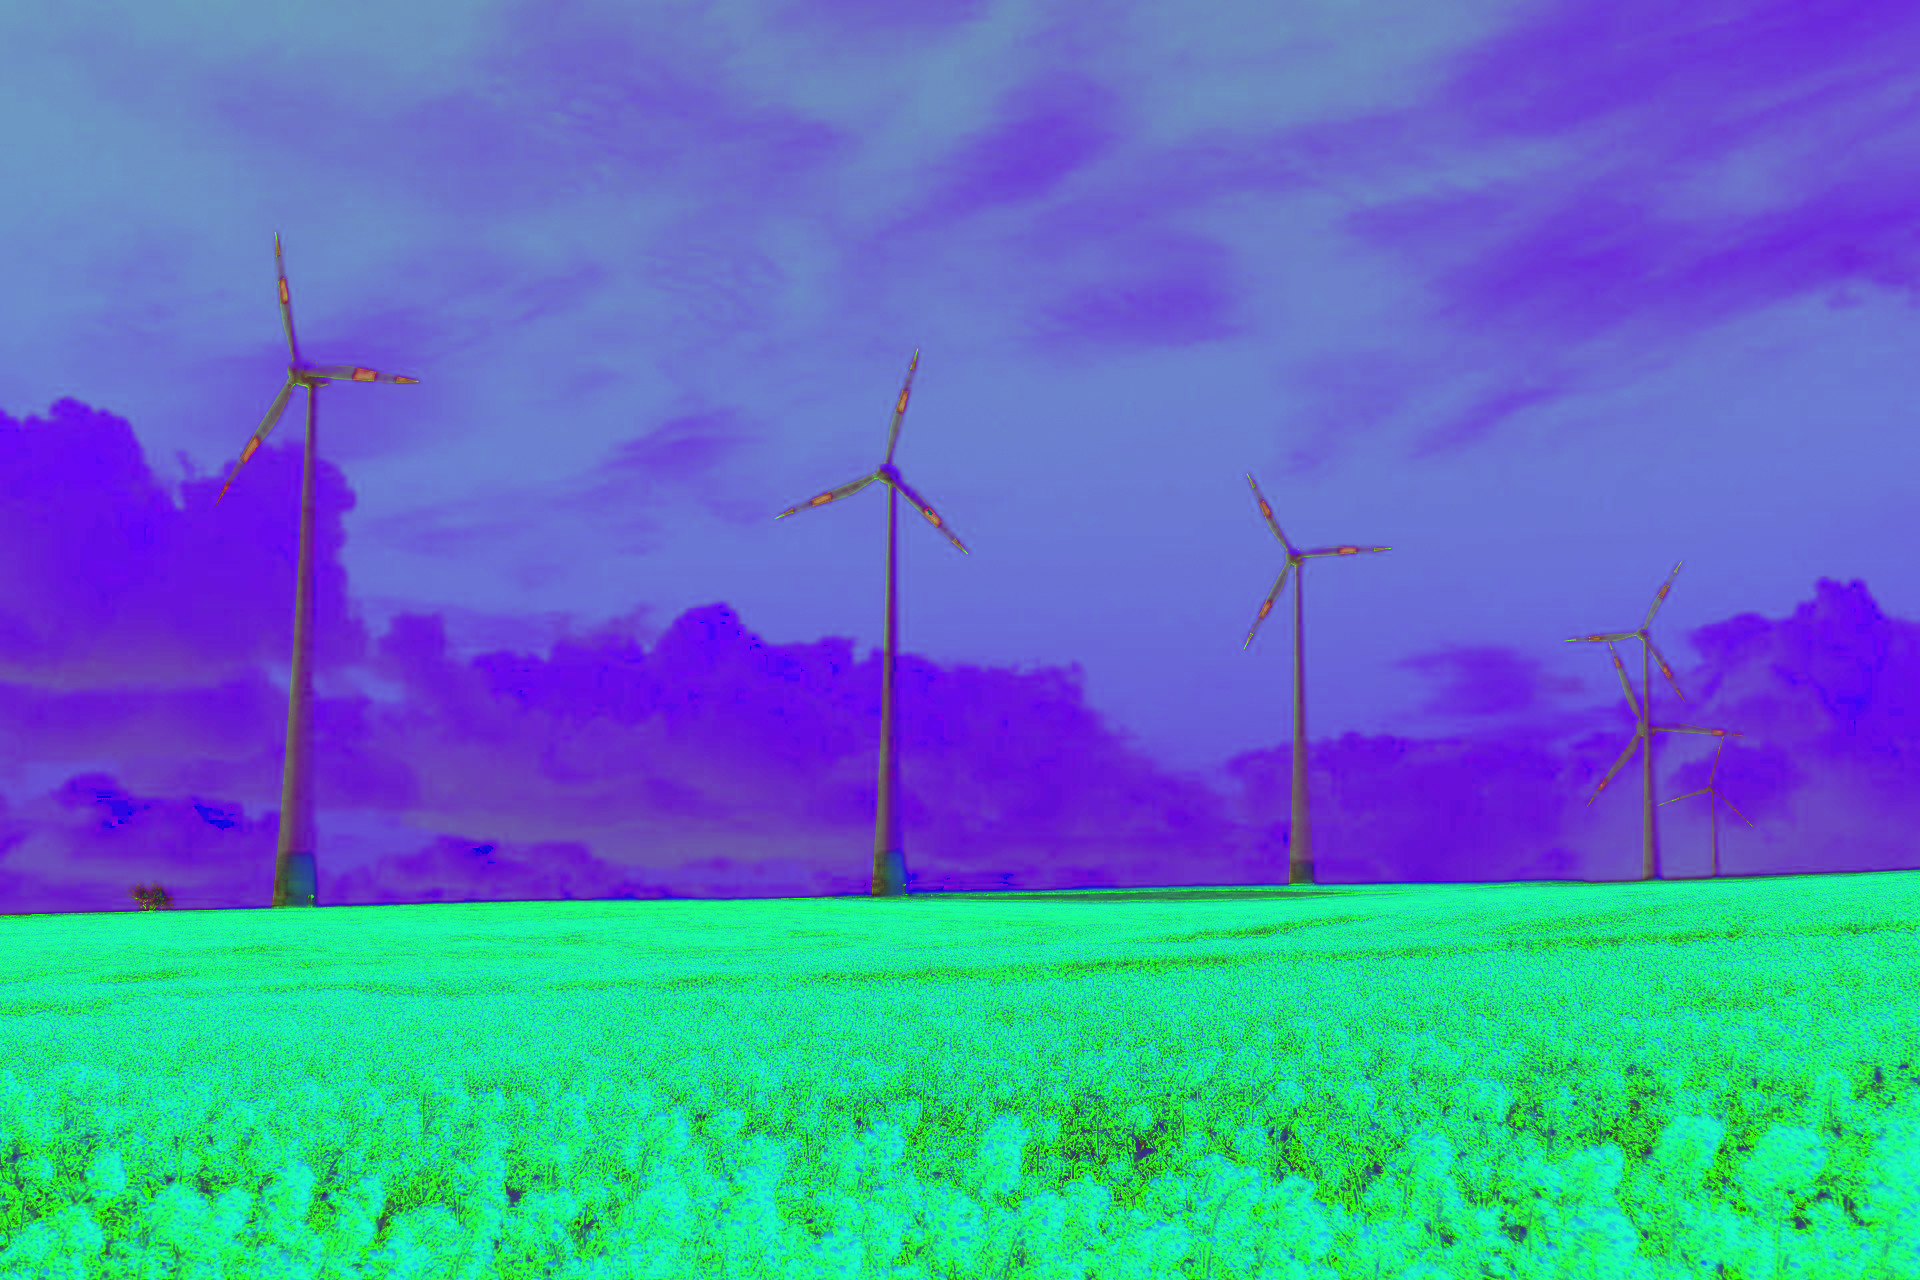

In [3]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
image = Image.fromarray(hsv)
image

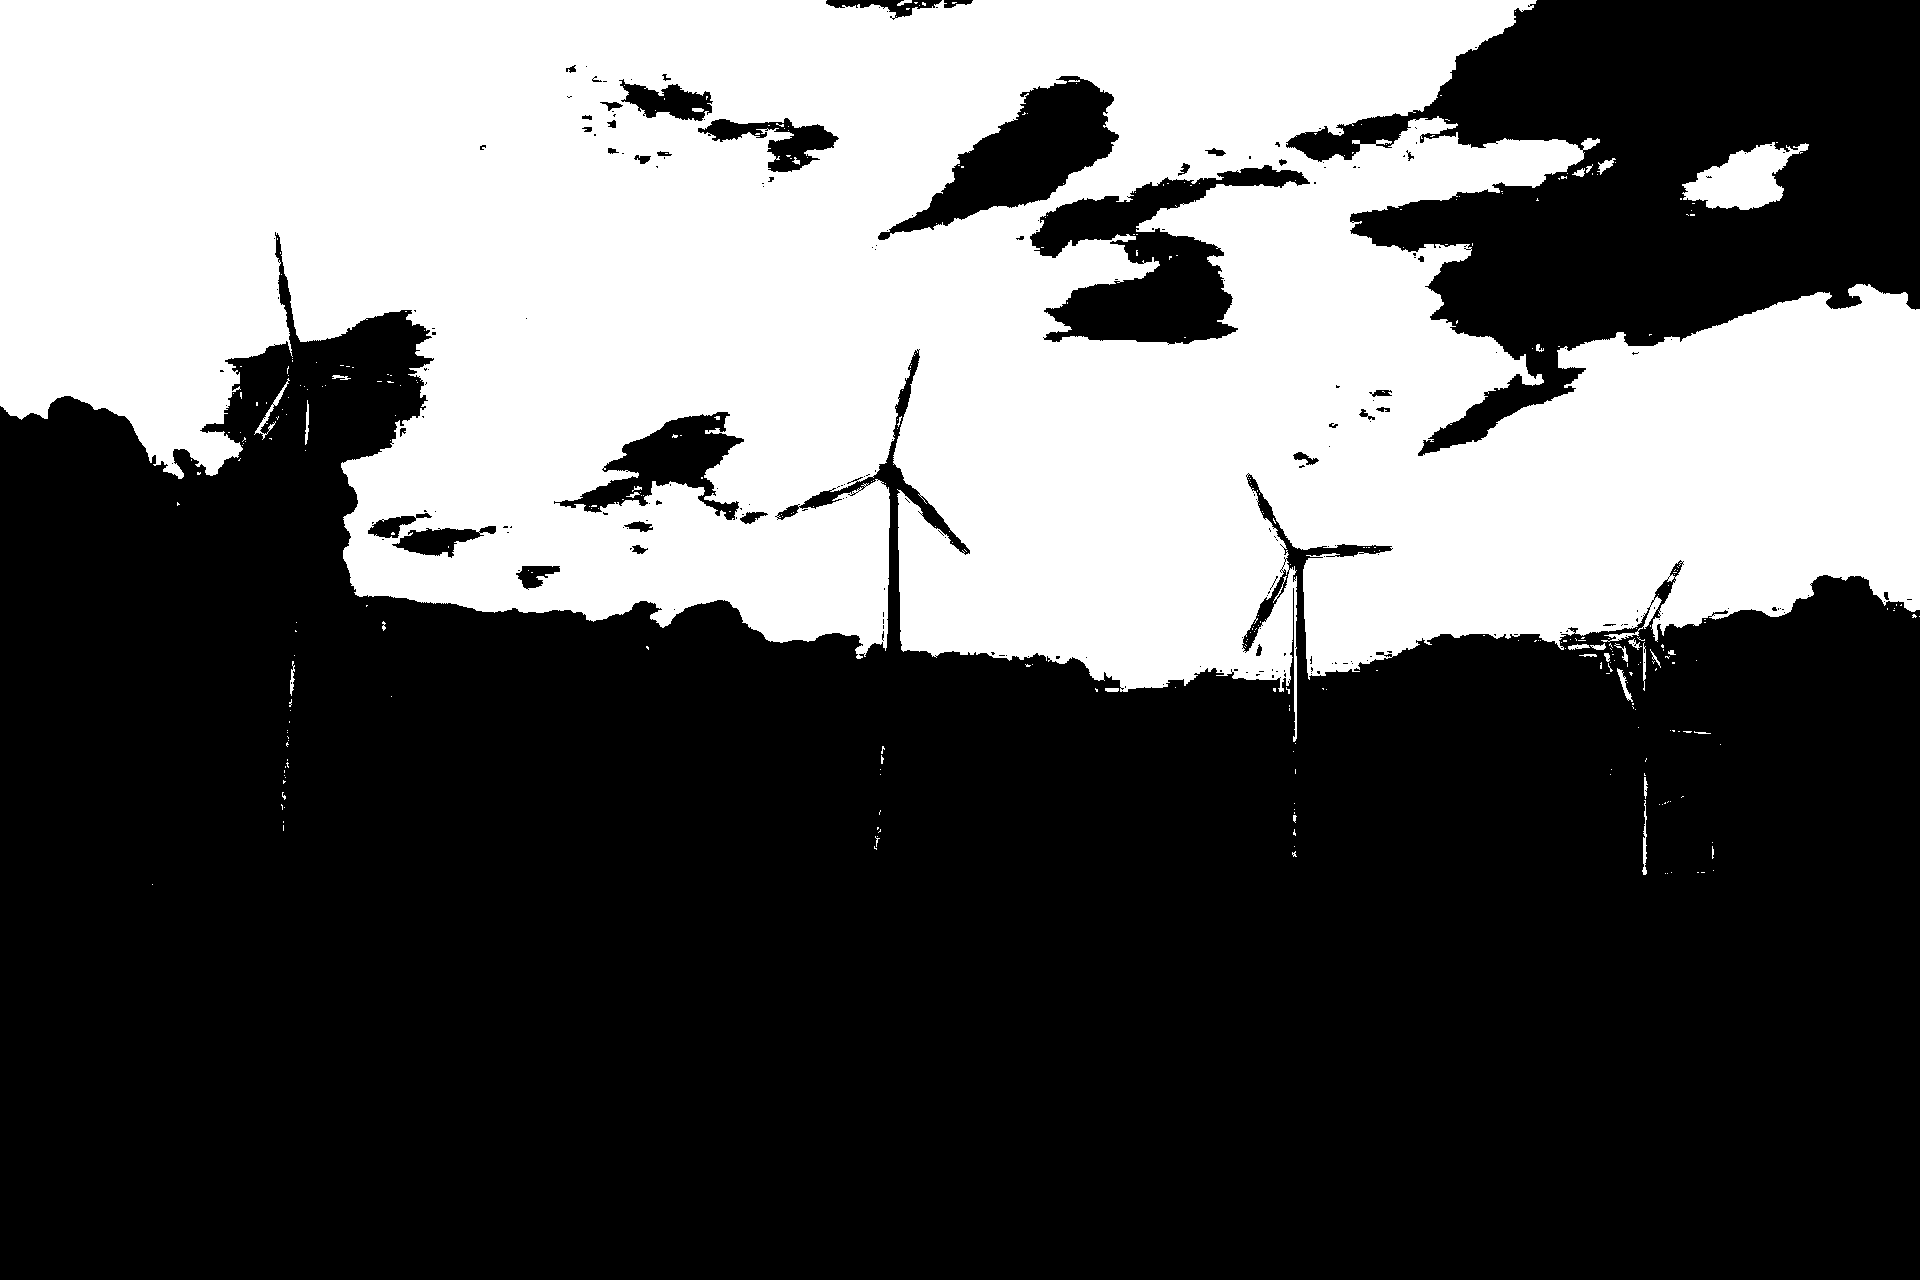

In [4]:
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])
mask = cv.inRange(hsv, lower_blue, upper_blue)
# cv.inRagne : lower_blue, upper_blue 사이 해당하면 1(흰색)
# 해당하지 않으면 0(검은색)을 반환
image = Image.fromarray(mask)
image

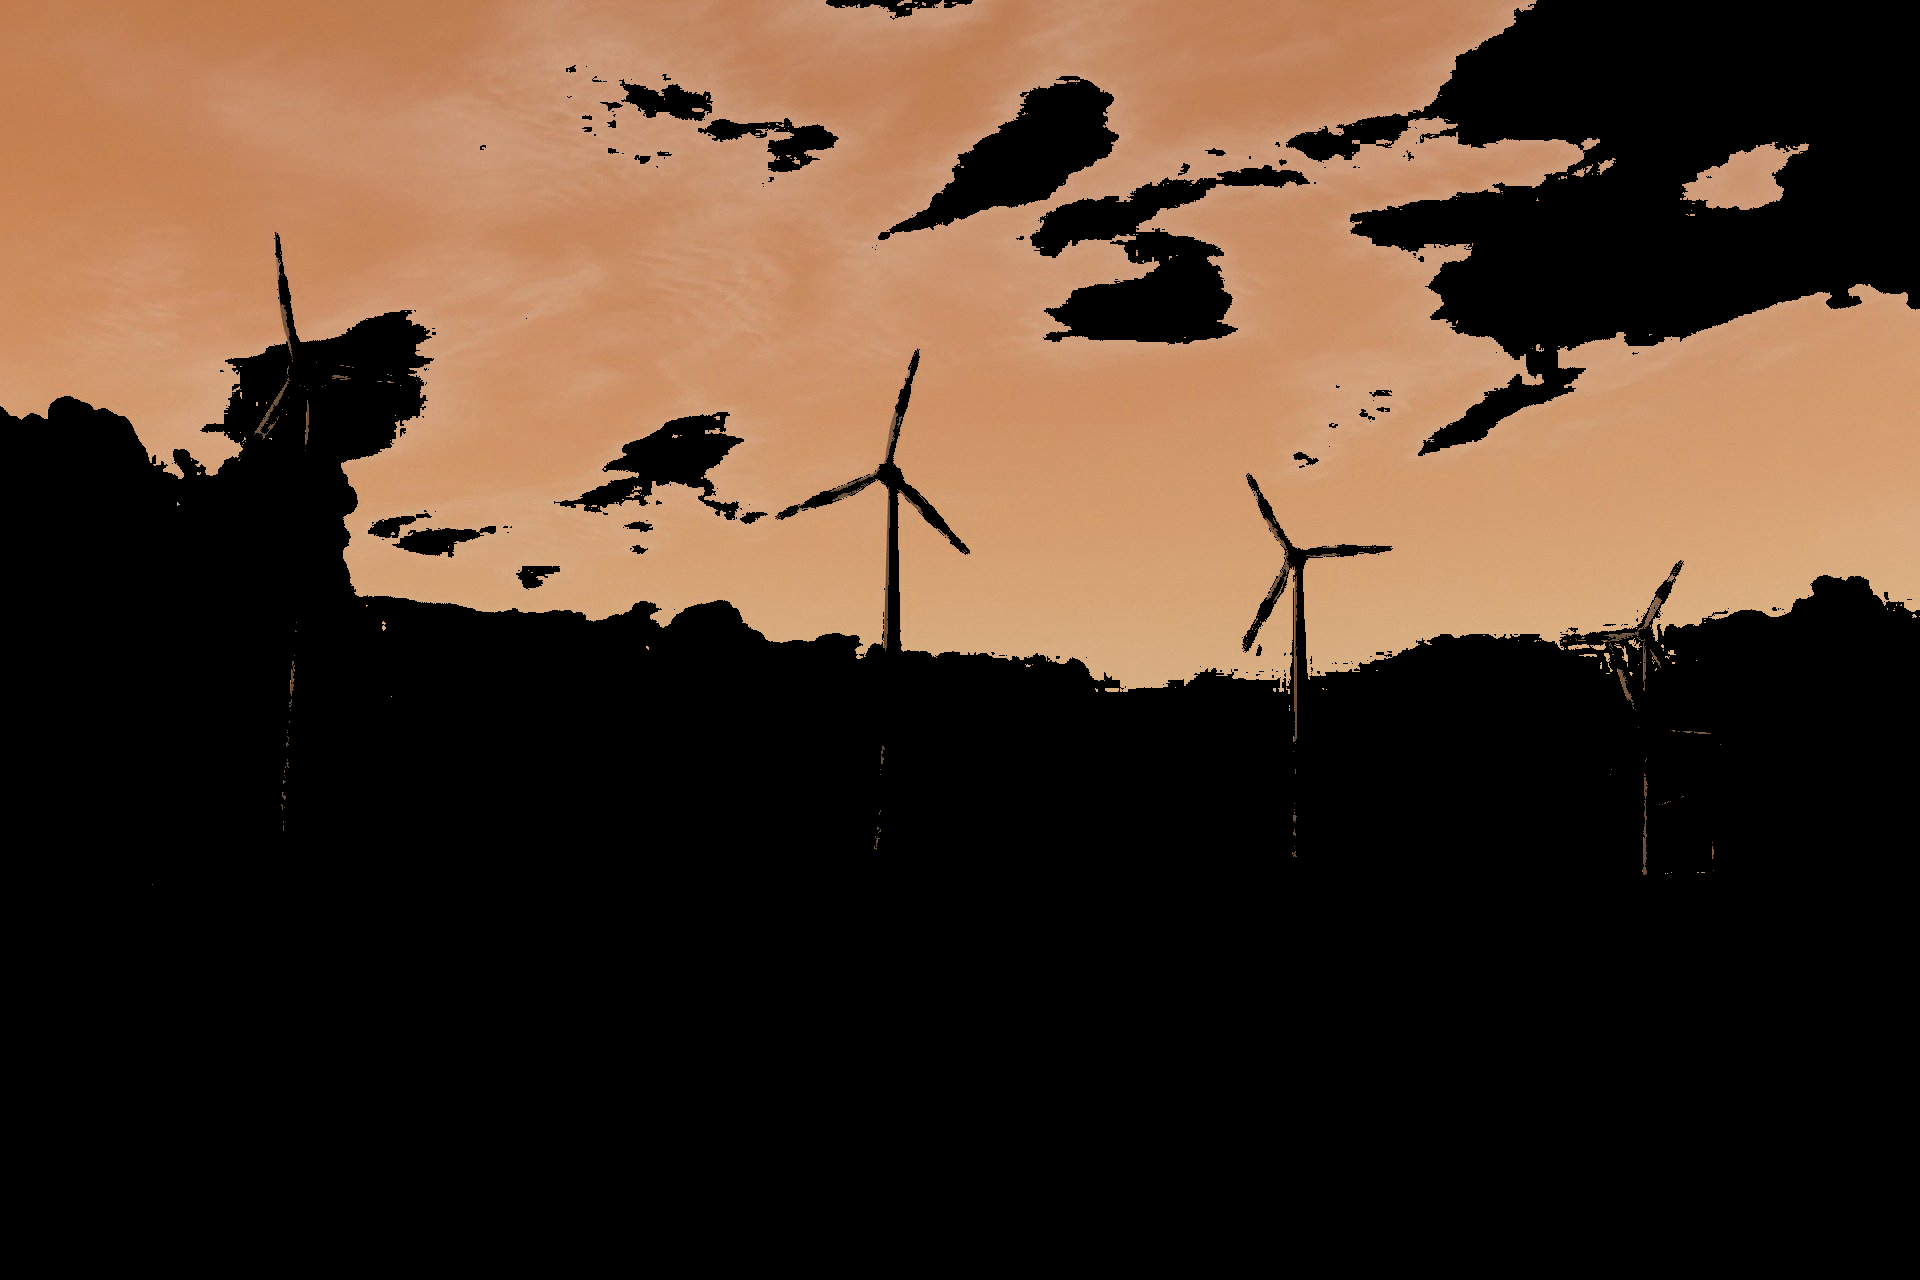

In [5]:
res = cv.bitwise_and(img, img, mask=mask)
# bitwise_end : 두장의 이미지를 and 비트 연산
# img라는 동일한 이미지를 넣었으므로 동일한 이미지가 나온다.
# mask 옵션을 줘서 해당 부분만 따온다.
image = Image.fromarray(res)
image

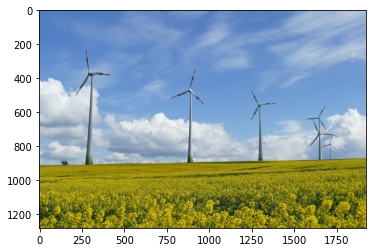

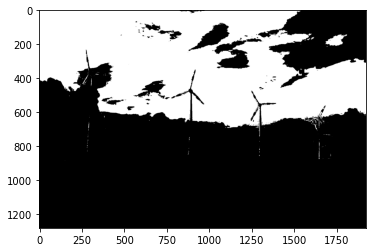

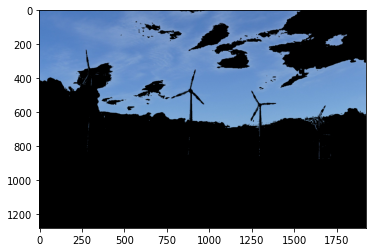

In [6]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

## 이미지 찾아내기

In [27]:
import os
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)
test_image = []
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        data = train[b'data'][i].reshape([32,32,3], order='F')
        data = data.swapaxes(0,1)
        image = Image.fromarray(data)
        image.save(os.path.join(images_dir_path, train[b'filenames'][i].decode()))

100%|██████████| 50000/50000 [00:18<00:00, 2724.89it/s]


#### tqdm
진행상황을 표시하는 패키지

In [48]:
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    
    img = Image.open(image_path)
    cv_image = cv.imread(image_path)
    
    f = plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title('Image')
    
    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i, col in enumerate(color):
        hist = cv.calcHist([cv_image], [i],None, [256],[0,256])
        im2.plot(hist, color=col)
    im2.set_title('Histogram')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


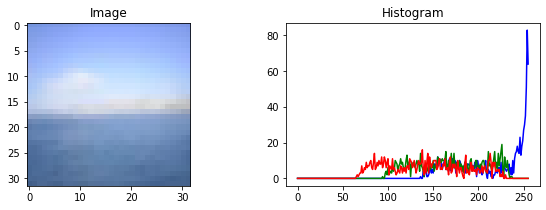

In [47]:
draw_color_histogram_from_image('adriatic_s_001807.png')

#### calcHist??
[document](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)    
```

void cv::calcHist	(	const Mat * 	images,
int 	nimages,
const int * 	channels,
InputArray 	mask,
OutputArray 	hist,
int 	dims,
const int * 	histSize,
const float ** 	ranges,
bool 	uniform = true,
bool 	accumulate = false 
)	
```
```python
cv.calcHist([cv_image], [i],None, [256],[0,256])
```
* cv_image : Source array
* [i] : Number of Souce image
* None : dims channels
* [256] : Optional mask image[i]와 크기가 같아야 한다.
* [0, 256] : output histogram


## 입력 받은 이미지 찾아내기

In [106]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from PIL import Image

In [43]:
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'

In [79]:
def getHistogram(filename):
    cv_image = cv2.imread(os.path.join(image_path, filename))
    histograms = []
    for i in range(3):
        hist = cv2.calcHist([cv_image], [i], None,[4], [0,256])
        histograms.append(hist)
    histograms = np.concatenate(histograms)
    histograms = cv2.normalize(histograms, histograms)
    return histograms

##### np.concatenate(histogram)
행렬 합치기
##### cv2.normalize(histogram, histogram)
정규화

In [80]:
def build_histogram_db():
    path = image_path
    filelist = os.listdir(path)
    histograms = {}
    for filename in tqdm(filelist):
        cv_image = cv2.imread(os.path.join(path, filename))
        histogram = getHistogram(filename)
        histograms[filename] = histogram
    return histograms
    

In [81]:
def get_target_histogram():
    filename = input('이미지 이름을 입력하세요.')
    path = os.path.join(image_path, filename)
    histogram = getHistogram(filename)
    return histogram
    

In [84]:
def search(histogram_db, target_histogram, rank_idx=5):
    histograms = {}
    for filename, histogram in tqdm(histogram_db.items()):
        compare = cv2.compareHist(histogram, target_histogram, method = cv2.HISTCMP_CORREL)
        histograms[filename]=compare
    
    histograms = dict(sorted(histograms.items(), key=lambda x:x[1], reverse=True)[:5])
    return histograms

In [107]:
def show_result(result_images):
    f = plt.figure(figsize=(10,3))
    for idx, name in enumerate(result_images.keys()):
        image = Image.open(os.path.join(image_path, name))
        img_plot = f.add_subplot(1,5,idx+1)
        img_plot.imshow(image)

In [85]:
histogram_db = build_histogram_db()
target_histogram = get_target_histogram()

100%|██████████| 49999/49999 [00:11<00:00, 4534.71it/s]


이미지 이름을 입력하세요.adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 710263.59it/s]


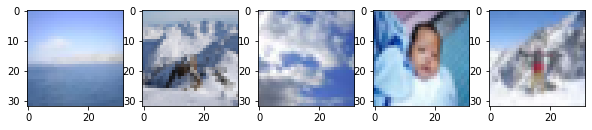

In [108]:
image_result = search(histogram_db, target_histogram)
show_result(image_result)